In [22]:
# imports some utilities ...

import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os

In [14]:
# defines important variables ...

from tensorflow.keras import layers, models
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

input_size_1 = 128
input_size_2 = 128
dim = 3
kernel_size = (5, 5)
output_size = len(categories)

Num GPUs Available:  1


In [15]:
#defines routes

root_dir = "./"
data_dir = root_dir + "dataset/chest_xray/"

training_images_dir =  data_dir + "train/"
test_images_dir = data_dir + "test/"

training_images_dir

'./dataset/chest_xray/train/'

## Let's visualizate our data

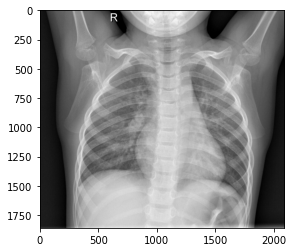

In [16]:
# Load an color image in grayscale
img = cv2.imread(training_images_dir + "/NORMAL/IM-0115-0001.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # RGB colorisation
plt.imshow(img_rgb)

In [18]:
type(img)
img_rgb.shape

(1858, 2090, 3)

In [53]:
list_img = []

def number_of_files(startpath):
    """Print the folder sutructure of a given folder"""
    for root, dirs, files in os.walk(startpath):
        list_img.append(files)

In [62]:
list_img = []
number_of_files(training_images_dir+"NORMAL/")
print("Number of normal lungs :", len(list_img[0]))

Number of normal lungs : 1341


In [63]:
list_img = []
number_of_files(training_images_dir+"PNEUMONIA/")
print("Number of pneumonial lungs :", len(list_img[0]))

Number of pneumonial lungs : 3875


## Datagen

In [64]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rescale = 1/255
).flow_from_directory(
    training_images_dir,
    target_size=(input_size_1, input_size_2),
    color_mode="rgb",
    class_mode="binary",
    classes=["NORMAL", "PNEUMONIA"],
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 5216 images belonging to 2 classes.


In [65]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255
).flow_from_directory(
        test_images_dir,
        target_size=(input_size_1, input_size_2),
        color_mode="rgb",
        class_mode="binary",
        classes=["NORMAL", "PNEUMONIA"],
        batch_size=32,
        shuffle=True,
        seed=42
)

Found 624 images belonging to 2 classes.


1.0


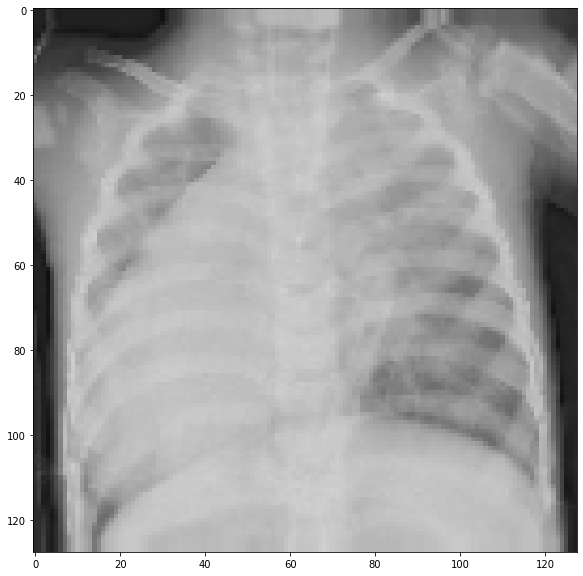

In [67]:
train_iter = iter(train_datagen)
train = train_iter.next()
print(train[1][0])
plt.figure(figsize=(10,10))
plt.imshow(train[0][0])

In [68]:
print("input size : ",input_size_1, input_size_2)
print("dim : ", dim)
print("kernel size : ", kernel_size)
output_size = output_size - 1 # For sigmoid activation its betwteen 0 and 1 
print("output size : ", output_size)


input size :  128 128
dim :  3
kernel size :  (5, 5)
output size :  1


In [69]:
def input_size_sequential(input_size_1, input_size_2, dim):
    return (input_size_1, input_size_2, dim)

In [70]:
input_size_sequential(input_size_1, input_size_2, dim)

(128, 128, 3)

In [71]:
# model = models.Sequential()

# model.add(layers.Conv2D(32, kernel_size = kernel_size, activation='relu', input_shape=input_size_sequential(input_size_1, input_size_2, dim)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(layers.BatchNormalization())


# model.add(layers.Conv2D(64, kernel_size = kernel_size, activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(layers.BatchNormalization())


# model.add(layers.Conv2D(128, kernel_size = kernel_size, activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(layers.BatchNormalization())


# model.add(layers.Conv2D(256, kernel_size = (5, 5), activation='relu'))
# model.add(layers.BatchNormalization())

# model.add(layers.Flatten()) # 2d to 1d

# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(output_size, activation='sigmoid'))

# model.summary()

In [79]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size = kernel_size, activation='relu', input_shape=input_size_sequential(input_size_1, input_size_2, dim)))
model.add(layers.Conv2D(32, kernel_size = kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(64, kernel_size = kernel_size, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten()) # 2d to 1d

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(output_size, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [80]:
import tensorflow.keras as keras
optimizer = "adam"

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['binary_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), ])

#  keras.metrics.TruePositives(), keras.metrics.FalsePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalseNegatives()

In [81]:
epochs = 10
with tf.device('/GPU:0'):

    history = model.fit(train_datagen, epochs=epochs, 
                        validation_data=test_datagen)

Epoch 1/10
163/163 [==============================] - 60s 363ms/step - loss: 0.6754 - binary_accuracy: 0.7168 - recall_1: 0.9130 - auc_1: 0.6458 - val_loss: 0.4206 - val_binary_accuracy: 0.8157 - val_recall_1: 0.9718 - val_auc_1: 0.9188
Epoch 2/10
163/163 [==============================] - 57s 350ms/step - loss: 0.3296 - binary_accuracy: 0.8471 - recall_1: 0.9293 - auc_1: 0.9089 - val_loss: 0.5473 - val_binary_accuracy: 0.7356 - val_recall_1: 0.9923 - val_auc_1: 0.9279
Epoch 3/10
163/163 [==============================] - 57s 350ms/step - loss: 0.3044 - binary_accuracy: 0.8762 - recall_1: 0.9341 - auc_1: 0.9231 - val_loss: 0.5378 - val_binary_accuracy: 0.7035 - val_recall_1: 0.9897 - val_auc_1: 0.9256
Epoch 4/10
163/163 [==============================] - 57s 352ms/step - loss: 0.2670 - binary_accuracy: 0.8961 - recall_1: 0.9389 - auc_1: 0.9456 - val_loss: 0.7316 - val_binary_accuracy: 0.6747 - val_recall_1: 0.9923 - val_auc_1: 0.9170
Epoch 5/10
163/163 [==============================] 

20/20 [==============================] - 4s 218ms/step - loss: 0.2978 - binary_accuracy: 0.8814 - recall_1: 0.9487 - auc_1: 0.9537


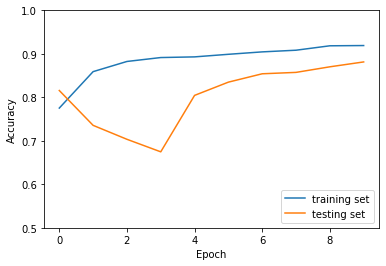

In [82]:
plt.plot(history.history['binary_accuracy'], label='training set')
plt.plot(history.history['val_binary_accuracy'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_binacc, test_recall, test_auc = model.evaluate(test_datagen)

20/20 [==============================] - 4s 218ms/step - loss: 0.2978 - binary_accuracy: 0.8814 - recall_1: 0.9487 - auc_1: 0.9537


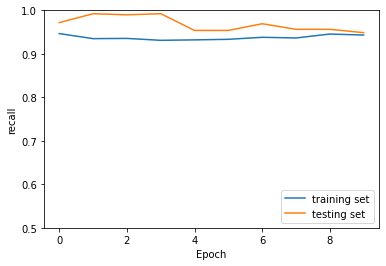

In [83]:
plt.plot(history.history['recall_1'], label='training set')
plt.plot(history.history['val_recall_1'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('recall')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_binacc, test_recall, test_auc = model.evaluate(test_datagen)

20/20 [==============================] - 4s 218ms/step - loss: 0.2978 - binary_accuracy: 0.8814 - recall_1: 0.9487 - auc_1: 0.9537


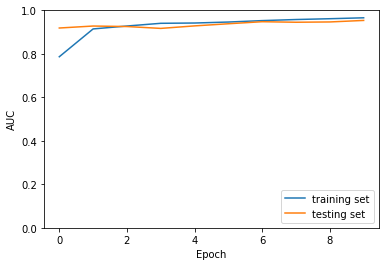

In [84]:
plt.plot(history.history['auc_1'], label='training set')
plt.plot(history.history['val_auc_1'], label = 'testing set')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_binacc, test_recall, test_auc = model.evaluate(test_datagen)

In [85]:
model.save('pneumonia_A88_R924_AUC95.h5')

In [86]:
# from tensorflow import keras
# model = keras.models.load_model('./model/pneumonia_A87_R92_AUC94.h5')

0.0


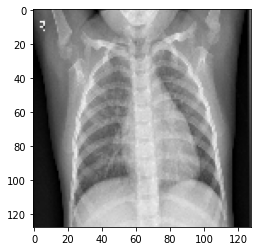

In [101]:
test_iter = iter(test_datagen)
test = test_iter.next()
print(test[1][0])
plt.imshow(test[0][0])

In [102]:
my_test = np.reshape(test[0][0], ( 1, *test[0][0].shape))

In [103]:
my_test.shape

(1, 128, 128, 3)

In [104]:
np.min(my_test)

0.0

In [105]:
np.max(my_test)

1.0

In [106]:
my_test.dtype

dtype('float32')

In [107]:
model.predict(my_test)

array([[0.08915038]], dtype=float32)